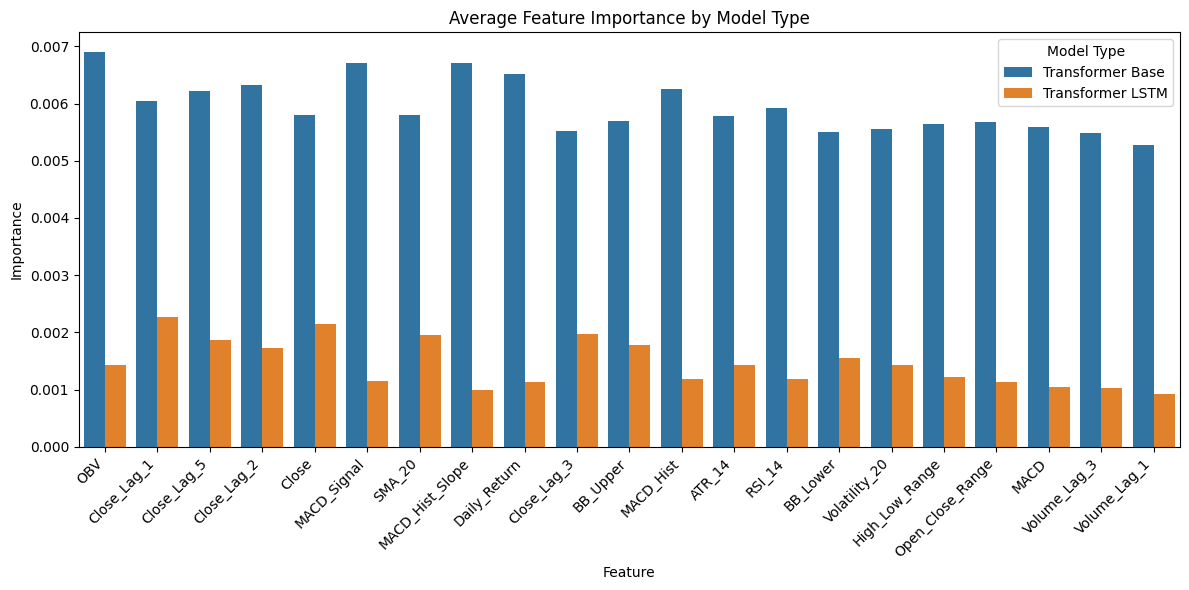

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saliency data
df = pd.read_csv("saliency_outputs/summary_saliency.csv")

# Drop identifier columns and store separately
feature_cols = df.columns.difference(['model_type', 'hyperparam_set'])

# Compute average saliency per feature per model
avg_saliency = df.groupby('model_type')[feature_cols].mean().T.reset_index()
avg_saliency.columns = ['Feature', 'Transformer Base', 'Transformer LSTM']

# Melt the dataframe for easier plotting
melted = avg_saliency.melt(id_vars='Feature', var_name='Model Type', value_name='Importance')

# Sort by average importance across models for better visual order
feature_order = melted.groupby('Feature')['Importance'].mean().sort_values(ascending=False).index

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Feature', y='Importance', hue='Model Type', order=feature_order)
plt.xticks(rotation=45, ha='right')
plt.title('Average Feature Importance by Model Type')
plt.tight_layout()
plt.show()
